# Tutorial 1: Principle of Satellite Remote Sensing

**Content creators:** Daniele Corradini

**Content reviewers:** Claudia Acquistapace, Paula Bigalke

**Affiliation:** Institute of Geophysics and Meteorology, University of Cologne, Germany

**Contact**: dcorrad1@uni-koeln.de

# Tutorial Objectives

In this tutorial, students should get familiar in effectively managing geostationary satellite data from MSG using Python, learning how to visualize it and utilize its channels to extract meaningful cloud properties.

By the end of this tutorial you will be able to:

* Plot Visible (VIS) and Infrared (IR) channels after filtering outliers and selecting case studies
* Understand how to use MSG channels and their combinations to understand cloud and enviromental features.

# Setup

I am using Python 3.10.12 Kernel installed using a conda eviroments were the main python packages are installed. 

Create a google colab notebook and upload data in google drive.

In [2]:
# Install packages in Google Colab
!pip install satpy matplotlib cartopy

#In Google Colab, you use a pre-configured environment that runs in the cloud, 
#but you can still install packages during your session. However, note that these installations are temporary; 
#they only last for the duration of your session. 
# Once the session ends, you'll need to reinstall any packages when you start a new session.

## Import libraries

In [1]:
# imports
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt 
import cartopy.crs as ccrs
from glob import glob
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import pandas as pd
import satpy

## Section 1: Data Preprocessing

This section focuses on accessing and processing MSG satellite data stored in netCDF format. We will explore a case study involving a hailstorm that occurred in Northern Italy on July 24, 2023. Key steps in our data preprocessing will include:

**Opening the Data**: Using xarray to load the dataset, which allows for efficient handling and manipulation of the data.

**Spatial Visualization**: Plotting spatial maps for selected timestamps to visually assess the data at different intervals.

**Domain Cropping**: Narrowing down the dataset to the area of interest, focusing on the region most affected by the hailstorm.

**Nighttime Data Filtering**: Excluding or flagging data collected during nighttime to ensure the analysis is confined to daytime observations when satellite imagery is most effective.

**Outlier Detection**: Examining the distribution of the data to identify and address any outliers that may skew the analysis.

**nderstanding Parallax Correction**: Discussing the significance of parallax correction in satellite data to enhance the accuracy of geolocation.

**Data Regridding**: Explaining the process and importance of regridding the data for consistency in spatial analysis across different datasets.

These preprocessing steps are crucial for setting up a robust analysis framework, ensuring that subsequent analyses are based on accurate and relevant satellite data.

**1.1 Open Dataset**

(1 point) Define the time span, and open Dataset using xarray, being careful on fill all the missing part of the code 

In [4]:
# Define path and filepattern
filepattern = "20230724-EXPATS-RG"
folder_path = "/data/sat/msg/netcdf/parallax/2023/07/" #When available use the parallaxed corrected here

# Open the datasets using xarray
ds = xr.open_dataset(folder_path+filepattern) #TODO 

ds

<xarray.Dataset> Size: 279MB
Dimensions:  (lat: 239, lon: 276, time: 96)
Coordinates:
  * lat      (lat) float32 956B 42.0 42.04 42.08 42.12 ... 51.44 51.48 51.52
  * lon      (lon) float32 1kB 5.0 5.04 5.08 5.12 ... 15.88 15.92 15.96 16.0
  * time     (time) datetime64[ns] 768B 2023-07-24 ... 2023-07-24T23:45:00
Data variables:
    IR_016   (time, lat, lon) float32 25MB ...
    IR_039   (time, lat, lon) float32 25MB ...
    IR_087   (time, lat, lon) float32 25MB ...
    IR_097   (time, lat, lon) float32 25MB ...
    IR_108   (time, lat, lon) float32 25MB ...
    IR_120   (time, lat, lon) float32 25MB ...
    IR_134   (time, lat, lon) float32 25MB ...
    VIS006   (time, lat, lon) float32 25MB ...
    VIS008   (time, lat, lon) float32 25MB ...
    WV_062   (time, lat, lon) float32 25MB ...
    WV_073   (time, lat, lon) float32 25MB ...

**Questions**:

Q1.1 (1 point): Look closely at the xarray Dataset. How is it structured? 

#Sol: The Dataset is formed by 11 variables, each one representing one MSG-SEVIRI channel. Each varaibles contain the data for one day, with a time intervalled of 15 minutes. Besides the time, the variables also contain lat and lon coordinates. There are no attributes.

**1.2 Plot Maps**

(2 points) Plot channels map for a single timestamp



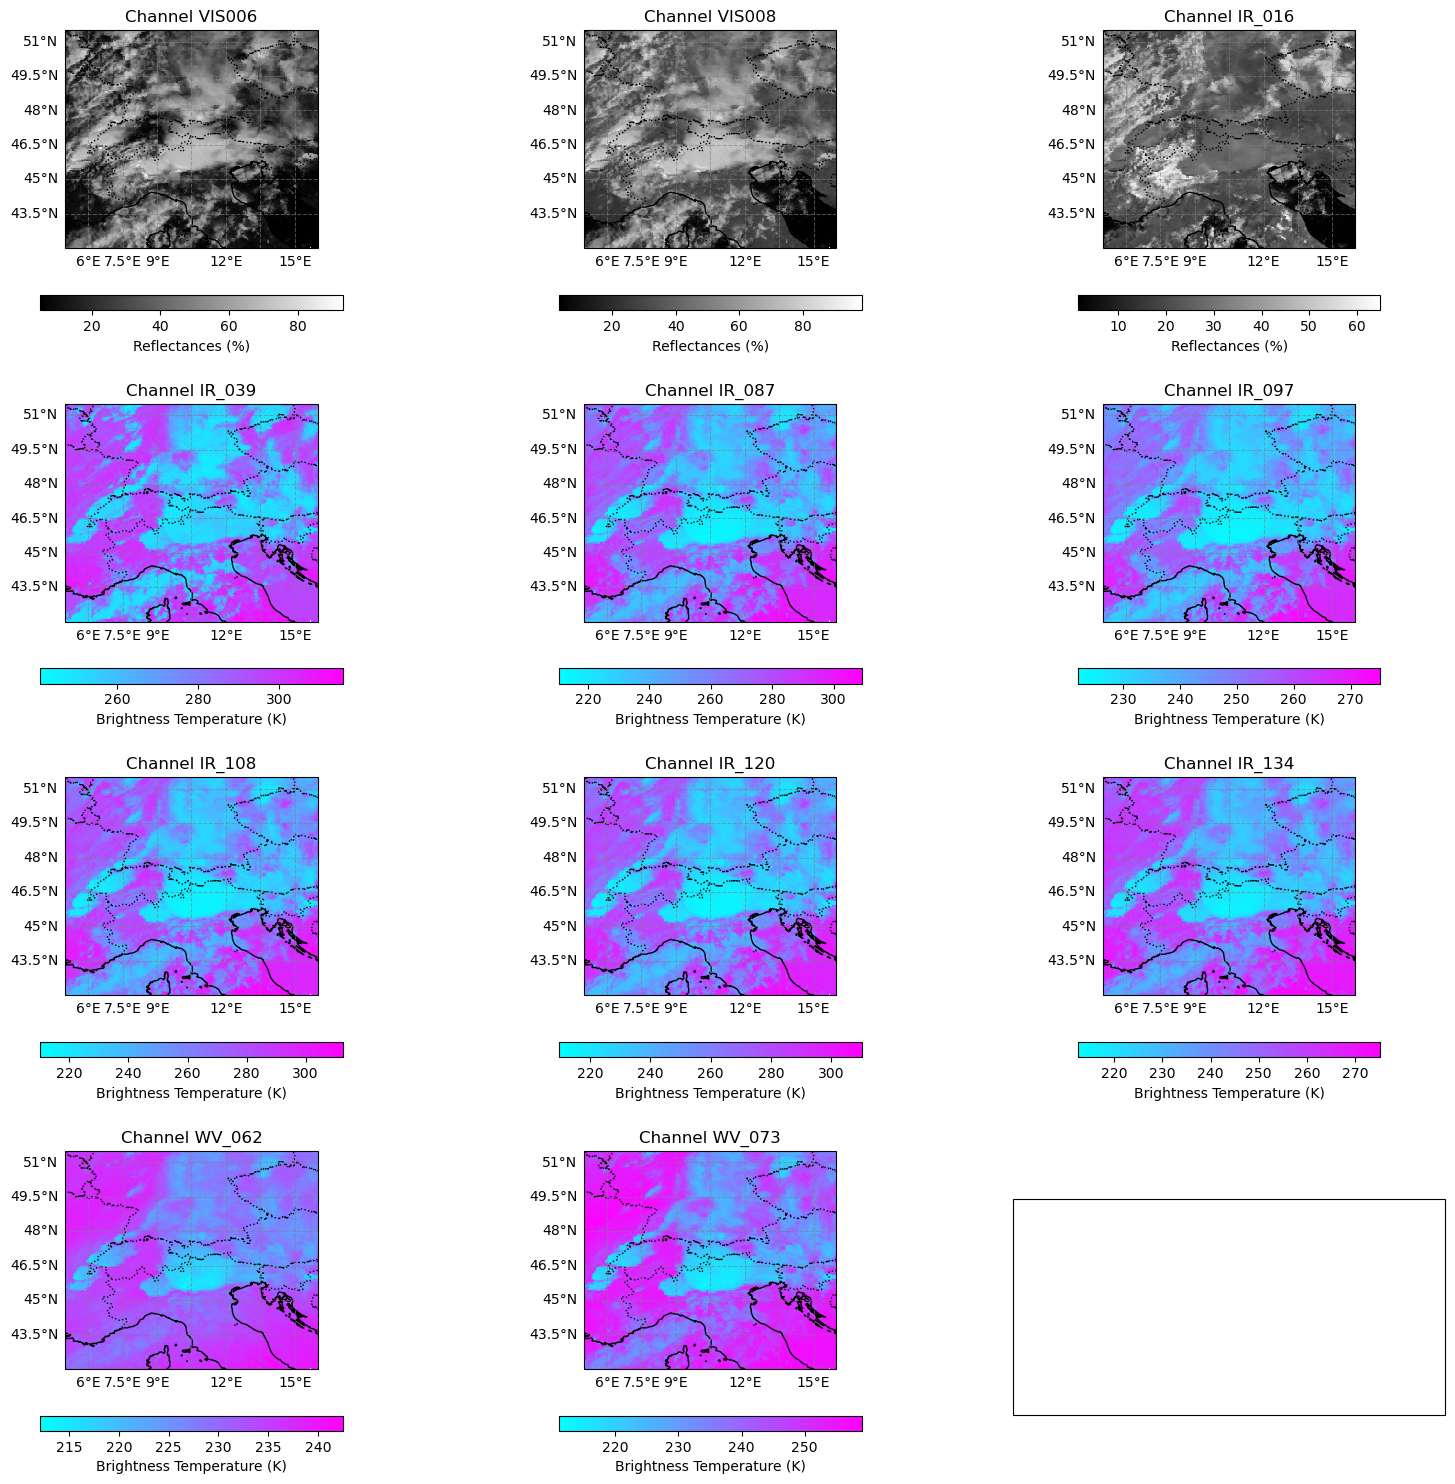

In [5]:
channels = ['VIS006', 'VIS008','IR_016', 'IR_039', 'IR_087', 'IR_097', 'IR_108', 'IR_120', 'IR_134', 'WV_062', 'WV_073']
channels_unit = ['Reflectances (%)','Reflectances (%)','Reflectances (%)', 'Brightness Temperature (K)', 'Brightness Temperature (K)', 'Brightness Temperature (K)', 'Brightness Temperature (K)', 'Brightness Temperature (K)','Brightness Temperature (K)','Brightness Temperature (K)','Brightness Temperature (K)']
channels_cmaps = ['gray','gray', 'gray', 'cool', 'cool', 'cool', 'cool', 'cool', 'cool', 'cool', 'cool'] 

extent = lon_min, lon_max, lat_min, lat_max = 5., 16., 42., 51.5

# Select a timestamp
data_ss = ds.isel(time=50)

def plot_single_map(ds, extent, channel, ax, channel_unit, channel_cmap):

    # Get one variable values from the dataset, lat and lon
    ch_data = ds[channel] #TODO insert the right name of the variable
    lat = ch_data['lat'] #TODO insert the right name of the variable
    lon = ch_data['lon'] #TODO insert the right name of the variable

    # Plot the channel data 
    ch_plot = ax.pcolormesh(lon, lat, ch_data.values.squeeze(),
                                transform=ccrs.PlateCarree(), cmap=channel_cmap, shading='nearest')

    # Add borders and coastlines
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')

    # Add colorbar
    cbar = plt.colorbar(ch_plot, ax=ax, orientation='horizontal', shrink=0.7)
    cbar.set_label(channel_unit)

    # Set extension
    ax.set_extent(extent)

    #set axis thick labels
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                    linewidth=0.75, color='gray', alpha=0.6, linestyle='--')
    gl.top_labels = False
    gl.right_labels = False
    gl.xlines = True
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 10, 'color': 'black'}
    gl.ylabel_style = {'size': 10, 'color': 'black'}

    # Set title
    ax.set_title(f'Channel {channel}')

    return ch_plot


# Define figure structure
num_rows = 4
num_cols = 3
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 15), subplot_kw={'projection': ccrs.PlateCarree()})
axs = axs.flatten()

# Plot each channel
for i, channel in enumerate(channels):
    plot_single_map(data_ss, extent, channel,axs[i],channels_unit[i],channels_cmaps[i])

# Adjust layout
plt.tight_layout()
fig.subplots_adjust(hspace=0.2, wspace=0.2)

# Show plot
plt.show()

**Questions**

Q1.2 (1 point) Now try to run again the code but setting the time at line 8 at 5 instad of 50. What happen to the VIS and NIR channels? Can you guess why?

**1.3 Nighttime Filtering**

(1 point) Mask the nighttime timestamps in the dataset for the VIS/NIR channels 

/home/dcorradi/anaconda3/envs/satpy_env/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,


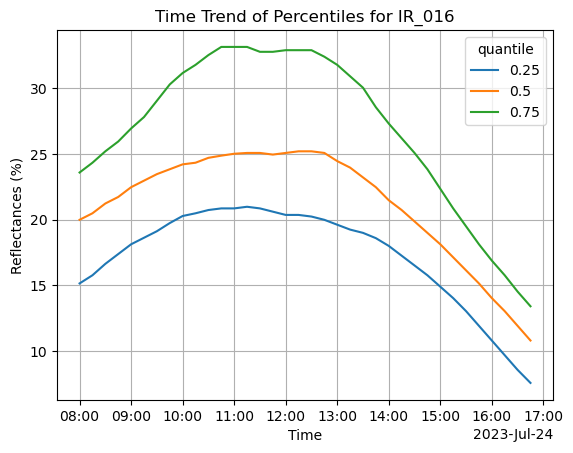

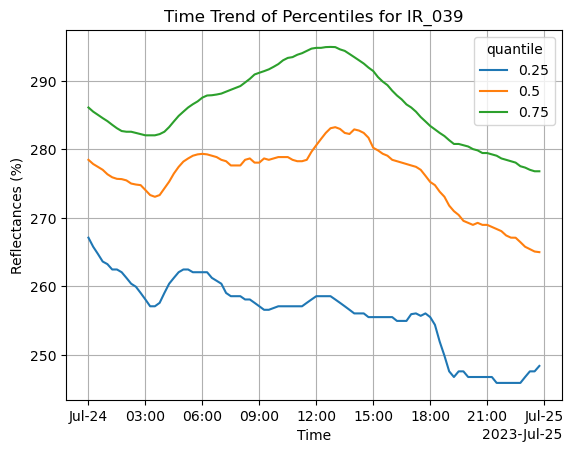

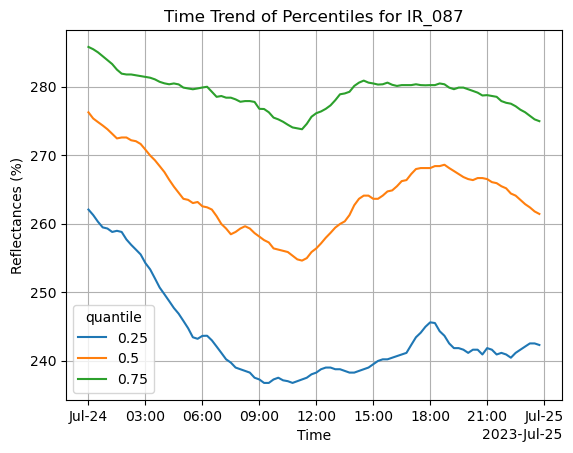

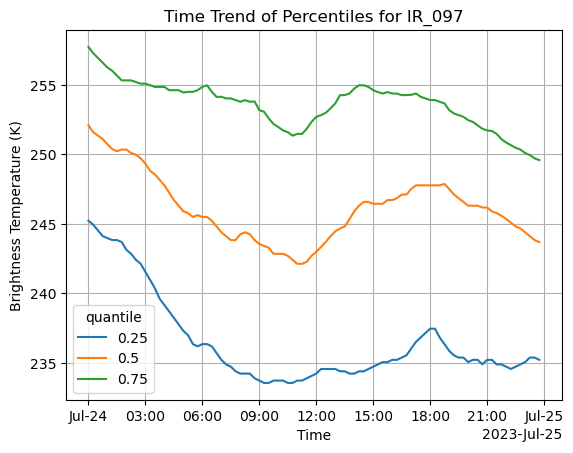

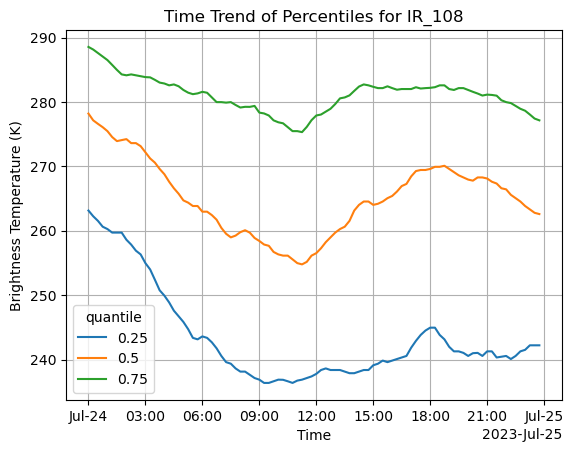

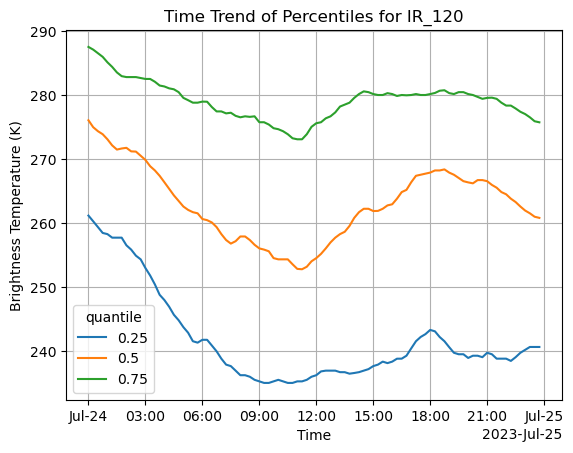

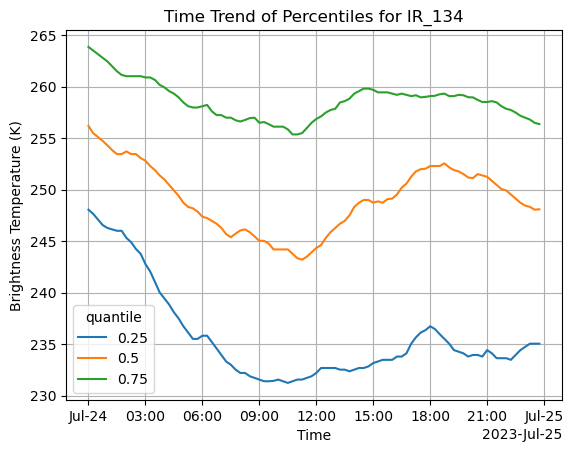

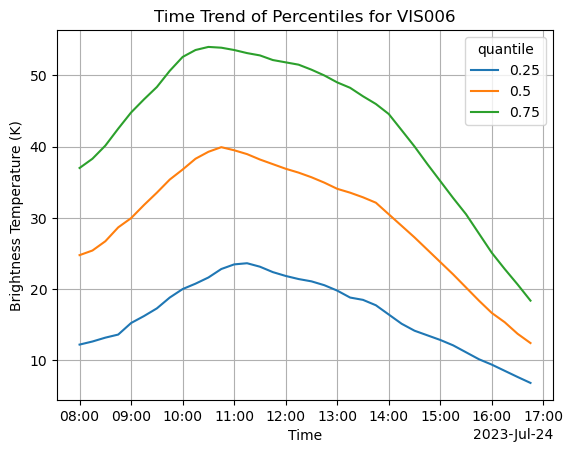

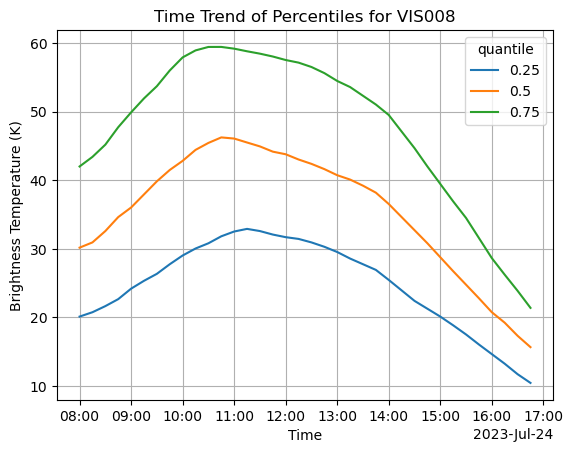

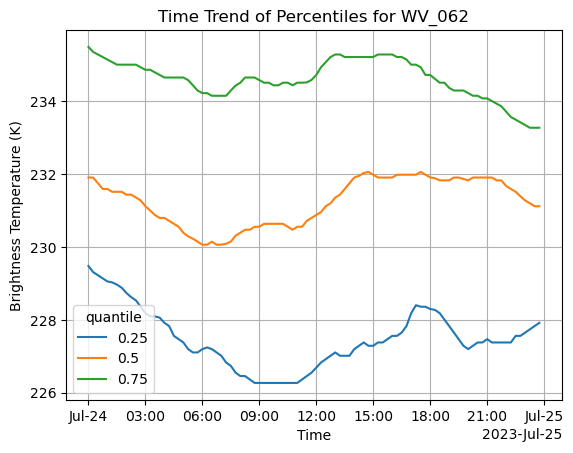

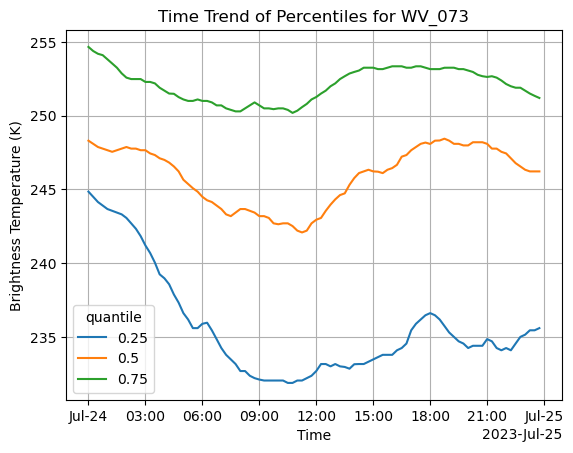

In [7]:
#Choose time thresholds far from the sunsets and sunrise, considering also the period of the year (Summer!)
#Be careful that the time of the dataset is given in UTC!
time_min = 8 #TODO
time_max = 16 #TODO

time_mask = (ds['time.hour'] >= time_min) & (ds['time.hour'] <= time_max) #TODO

# Apply the mask across selected variables 
selected_vars = ['IR_016', 'VIS006', 'VIS008'] #TODO
for var in selected_vars:
    ds[var] = ds[var].where(time_mask, np.nan)

#Check if the masking worked

# Compute 25-50-75th percentile and plot them along the time
ds_quantile = ds.quantile([0.25, 0.5, 0.75], dim=['lon', 'lat'])

# Loop through each variable in the dataset
for i, var in enumerate(ds_quantile.data_vars):
    ds_quantile[var].plot.line(x='time', hue='quantile', add_legend=True)
    plt.title(f'Time Trend of Percentiles for {var}')
    plt.xlabel('Time')
    plt.ylabel(channels_unit[i])
    plt.grid(True)
    plt.show()

**Questions**

Q1.3 (2 point): This nightime mask can be inaccurate if many timestamps for a long time series are considered (e.g. several months) or if a wider area (e.g spanning several latitudes). How would you make a more general nightime mask without considering the time coordinate?

#Sol: solar zenith angle

**1.4 Cropping Data**

(2 point) Now, crop the data on a specific domain of interest and plot the map of each channel.

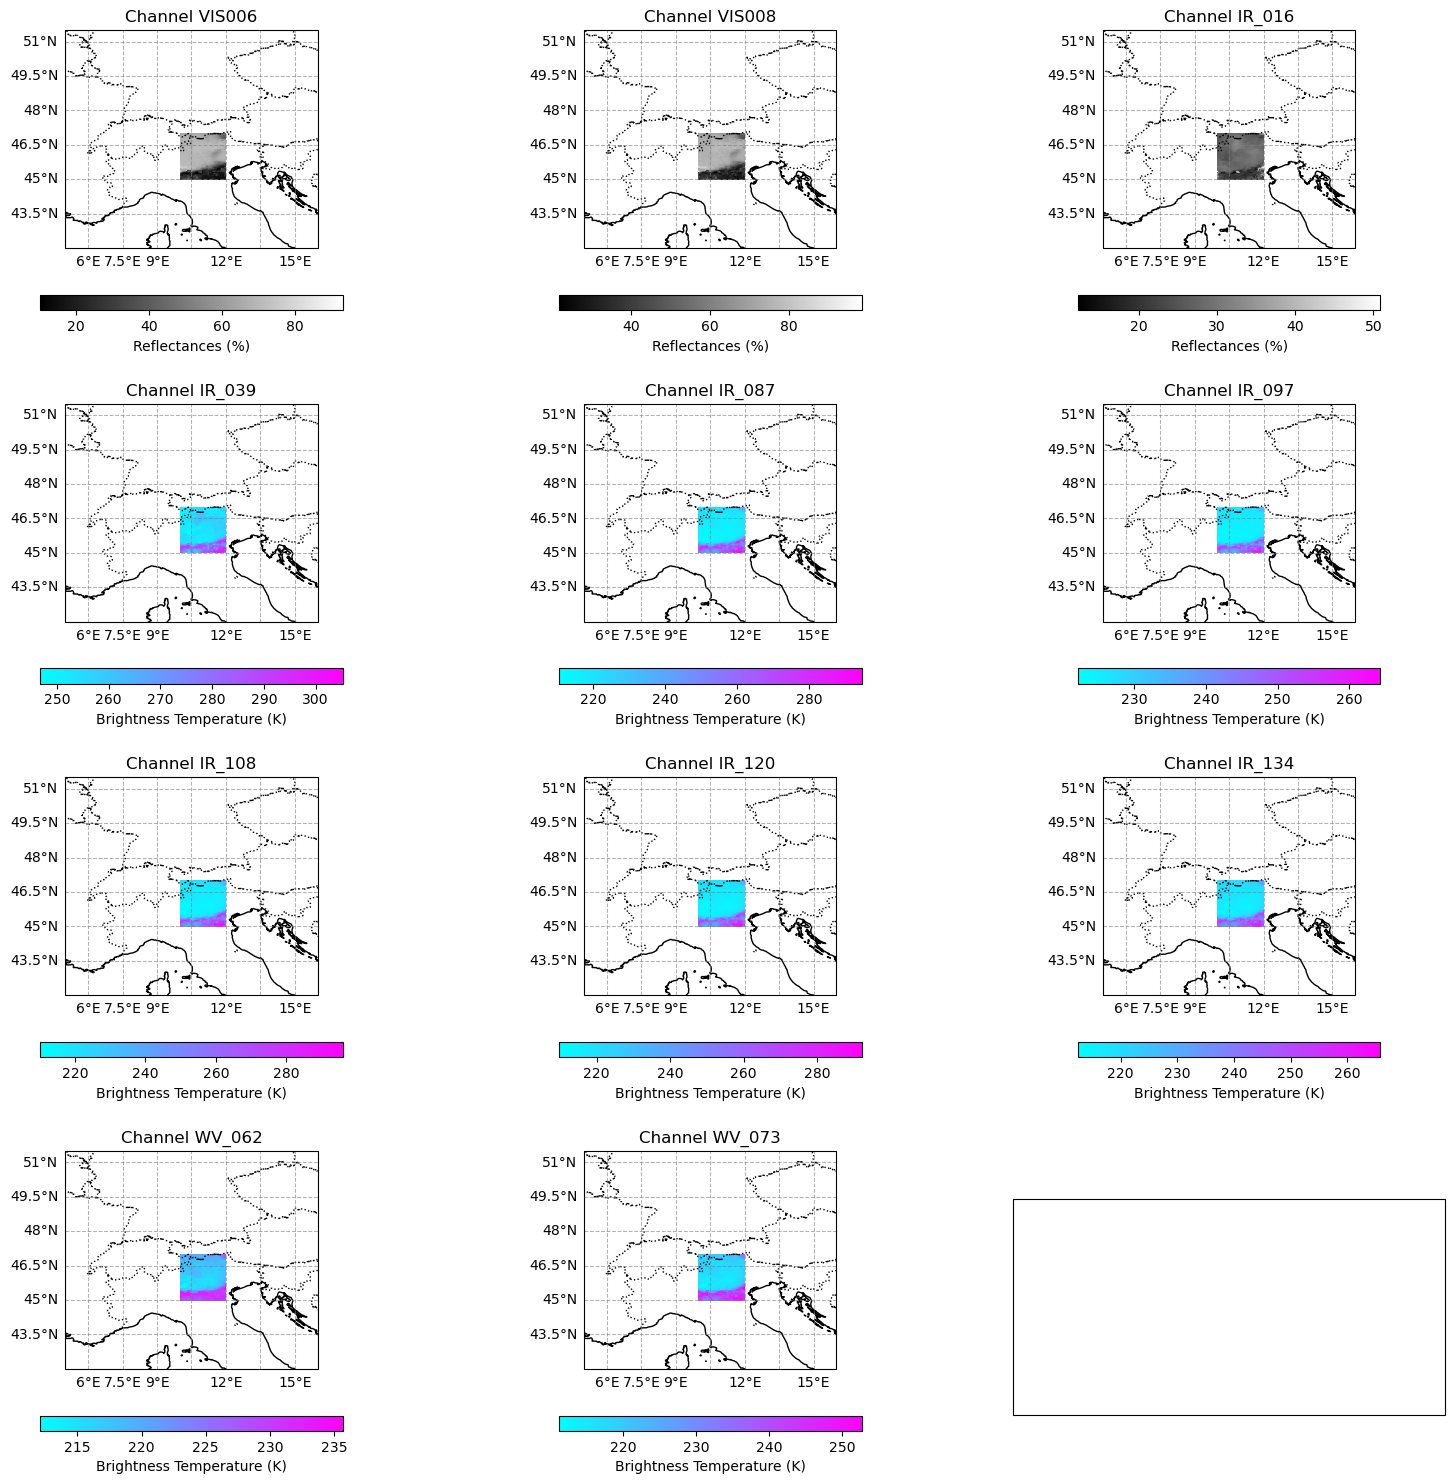

In [8]:
# Coordinates for Trento area
lon_min, lon_max, lat_min, lat_max = 10, 12, 45, 47 #TODO

# Assuming 'ds' is your xarray Dataset and has coordinates named 'lat' and 'lon'
ds_Trento = ds.copy(deep=True)  # Making a deep copy of the dataset

# Compute the conditions TODO
condition = ((ds_Trento.lon >= lon_min) & (ds_Trento.lon <= lon_max) &
             (ds_Trento.lat >= lat_min) & (ds_Trento.lat <= lat_max)).compute()

# Crop the dataset around the specified coordinates
ds_Trento = ds_Trento.where(condition, drop=True) #TODO

## TODO--> check the code before

# Define figure structure
num_rows = 4
num_cols = 3
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 15), subplot_kw={'projection': ccrs.PlateCarree()})
axs = axs.flatten()

# Plot each channel
for i, channel in enumerate(channels):
    plot_single_map(ds_Trento.isel(time=50) , extent, channel,axs[i],channels_unit[i],channels_cmaps[i])

# Adjust layout
plt.tight_layout()
fig.subplots_adjust(hspace=0.2, wspace=0.2)

# Show plot
plt.show()

**1.5 Checking outliers**

(1 point) Now plot the distribution of the data to see if there are any weird/corrupted values

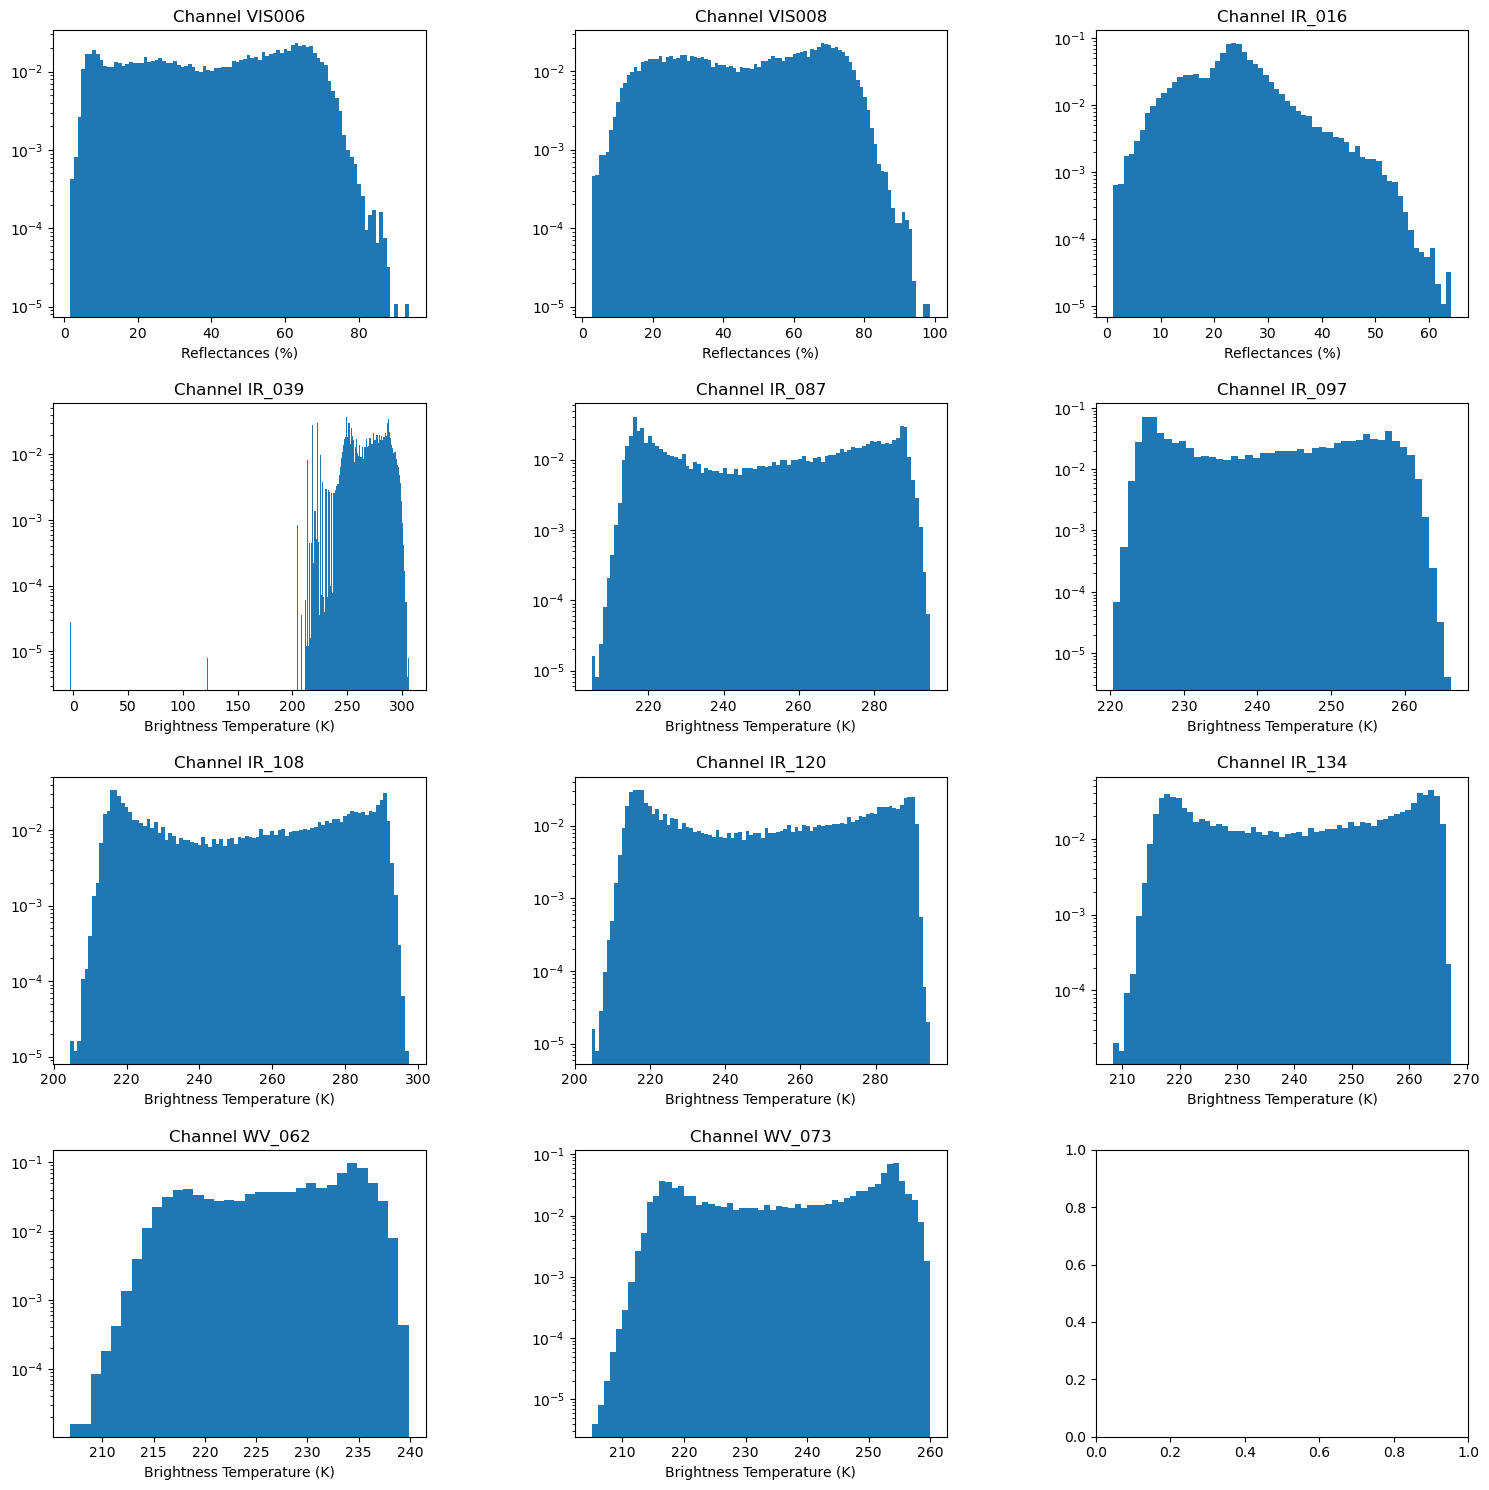

In [9]:
# Funtion that find the maximum and minimum values in a Dataset, for a specified variables
def get_max_min(ds, ch):
    ch_values = ds[ch][:]
    ch_values = ch_values.values.flatten()
    ch_values = ch_values[~np.isnan(ch_values)]
    max = np.amax(ch_values) #TODO
    min = np.amin(ch_values) #TODO

    return min, max


def plot_distribution(channels, data_ss, channels_unit, bin_width):
    num_rows = 4
    num_cols = 3
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 15))
    axs = axs.flatten()

    # Plot each channel
    for i, channel in enumerate(channels):
        ch_data = data_ss[channel]
        ch_min, ch_max = get_max_min(data_ss, channel)
        bins = np.arange(ch_min, ch_max + bin_width, bin_width) #TODO

        # Effettuare il plot dei dati del canale corrente
        axs[i].hist(ch_data.values.flatten(), bins=bins, density=True) 

        axs[i].set_xlabel(channels_unit[i])

        axs[i].set_yscale('log') #TODO

        # Aggiungere il titolo del subplot
        axs[i].set_title(f'Channel {channel}')

    # Aggiusta il layout
    plt.tight_layout()
    fig.subplots_adjust(hspace=0.3, wspace=0.4)

    # Mostra il plot
    plt.show()

plot_distribution(channels, ds_Trento, channels_unit, 1)


**Questions**

Q1.5.A (1 point) Where do you see outliers?

Q1.5.B (2 points) Why the distribution of the channel 3.9 µm it looks like that?

Q1.5.C (1 points) How would you remove the outliers? Complete the code below


In [10]:
# Filter the outliers

value_min = 200 #TODO

selected_vars = ['IR_039'] #TODO

# Apply the mask across selected variables 
for var in selected_vars:
    value_mask = ds[var] >= value_min #TODO
    ds[var] = ds[var].where(value_mask, np.nan)

**1.6 Parallax Correction**

(1 point) Open one file without parallax and another ne with the same timestamp with parallax correction and check for the differences 

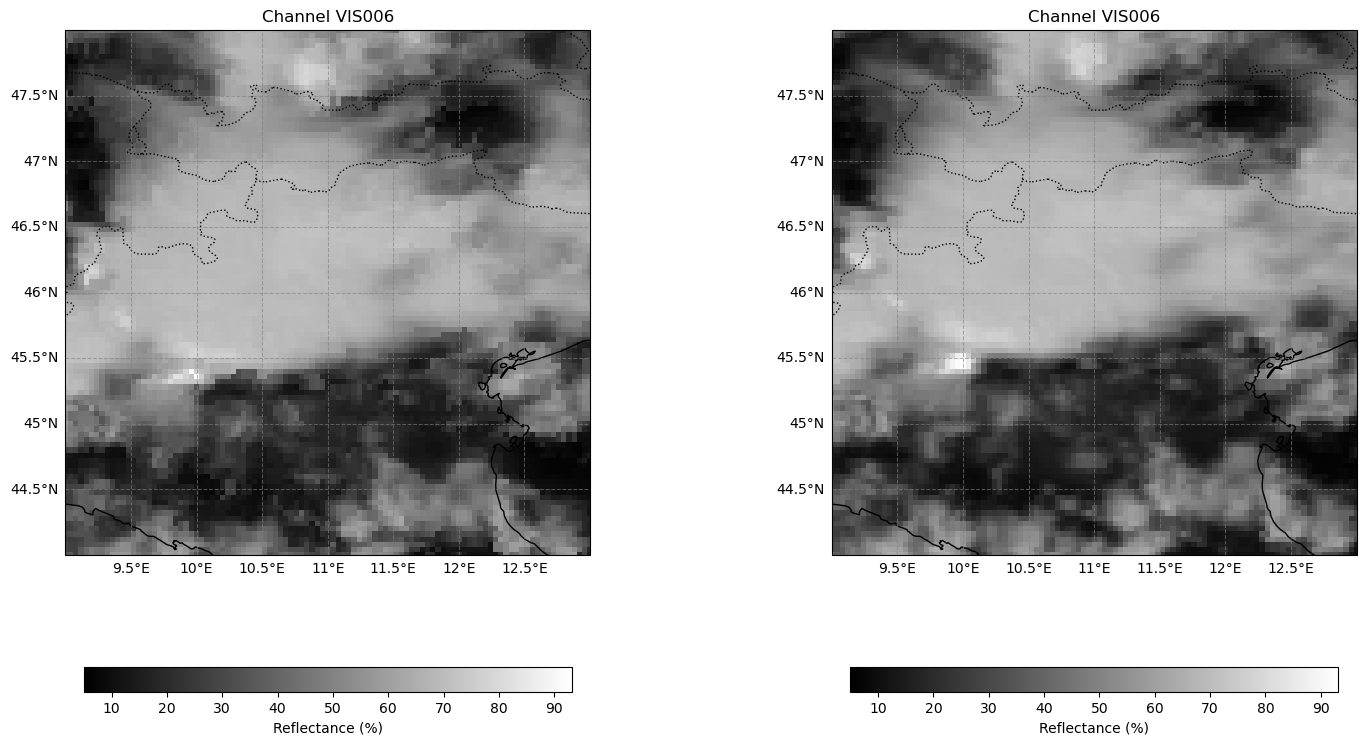

In [18]:
# Open file with parallax
ds_parallax = ds.isel(time=50) #Correspond to 2023-07-24 12:30
#print(ds_parallax.time)

# Open file without parallax 
file_noparallax = "/data/sat/msg/netcdf/noparallax/2023/07/24/MSG3-SEVI-MSG15-0100-NA-20230724124241_regular_grid.nc"
ds_noparallax = xr.open_dataset(file_noparallax)
ds_noparallax = ds_noparallax.isel(time=0) 

# Plot only one channel for each dataset #TODO
num_rows = 1
num_cols = 2
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 8), subplot_kw={'projection': ccrs.PlateCarree()})
axs = axs.flatten()

#reduce_area = lon_min, lon_max, lat_min, lat_max = 5, 12, 42, 48
reduce_area = lon_min, lon_max, lat_min, lat_max = 9, 13, 44, 48

# Plot one channel for both parallax and no parallax #TODO
plot_single_map(ds_parallax, reduce_area, 'VIS006',axs[0],'Reflectance (%)','gray')
plot_single_map(ds_noparallax, reduce_area, 'VIS006',axs[1],'Reflectance (%)','gray')

# Adjust layout
plt.tight_layout()
fig.subplots_adjust(hspace=0.1, wspace=0.1)

# Show plot
plt.show()


**Questions**

Q1.6.A (1 point) Can you spot which is the main difference among the two plot? (Hint: look at the realtive postion of the clouds with respect to the grid)

Q1.6.B (2 points) In case of really high clouds what will happen if the satellite view is really slanted?

**1.7 Regridding Satellite Data**

(1 point) In this subsection, we will demonstrate the process of regridding data to a different grid. Typically, regridding is performed to transition from an irregular, native satellite grid to a regularly spaced grid that is easier to handle.

For our purposes, although the data are already provided on a regular grid, we will regrid them onto another regular grid. This change is primarily for demonstration purposes. 

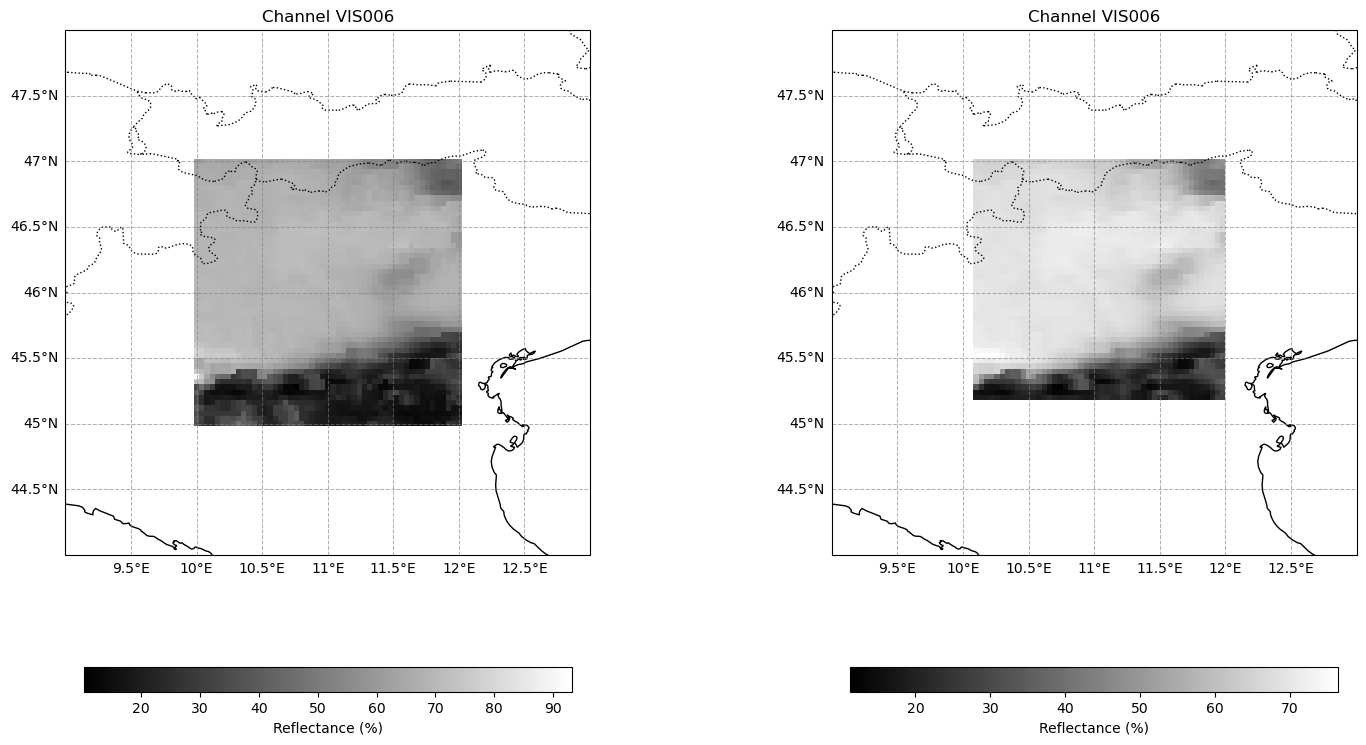

In [17]:
# Create shifted latitude and longitude arrays
lat_shifted = ds_Trento.lat + 0.2
lon_shifted = ds_Trento.lon + 0.1

# Interpolate the dataset to the new shifted grids
ds_shifted = ds_Trento.interp(lat=lat_shifted, lon=lon_shifted, method='linear') #TODO
ds_shifted['lon'] = lon_shifted
ds_shifted['lat'] = lat_shifted

# Plot only one channel for each dataset TODO
num_rows = 1
num_cols = 2
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 8), subplot_kw={'projection': ccrs.PlateCarree()})
axs = axs.flatten()

reduce_area = lon_min, lon_max, lat_min, lat_max = 9, 13, 44, 48

# Plot one channel for both parallax and no parallax
plot_single_map(ds_Trento.isel(time=50), reduce_area, 'VIS006',axs[0],'Reflectance (%)','gray')
plot_single_map(ds_shifted.isel(time=50), reduce_area, 'VIS006',axs[1],'Reflectance (%)','gray')

# Adjust layout
plt.tight_layout()
fig.subplots_adjust(hspace=0.1, wspace=0.1)

# Show plot
plt.show()

**Questions**

Q1.7.A (1 point)
What potential issues can arise when interpolating data near the boundaries of your domain? How can these issues be addressed?

Q1.7.B (2 points)
If you have a cloud mask defined as a categorical variable (0: clear sky, 1: cloudy), would you still use a linear interpolation method for regridding? Why or why not?

Q1.7.C (2 points)
Regridding can be used to modify the resolution of your data. How would you approach changing from a regular grid with a resolution of 0.04° to one with a resolution of 0.02°? Based on the provided code, can you write a snippet to increase the resolution?

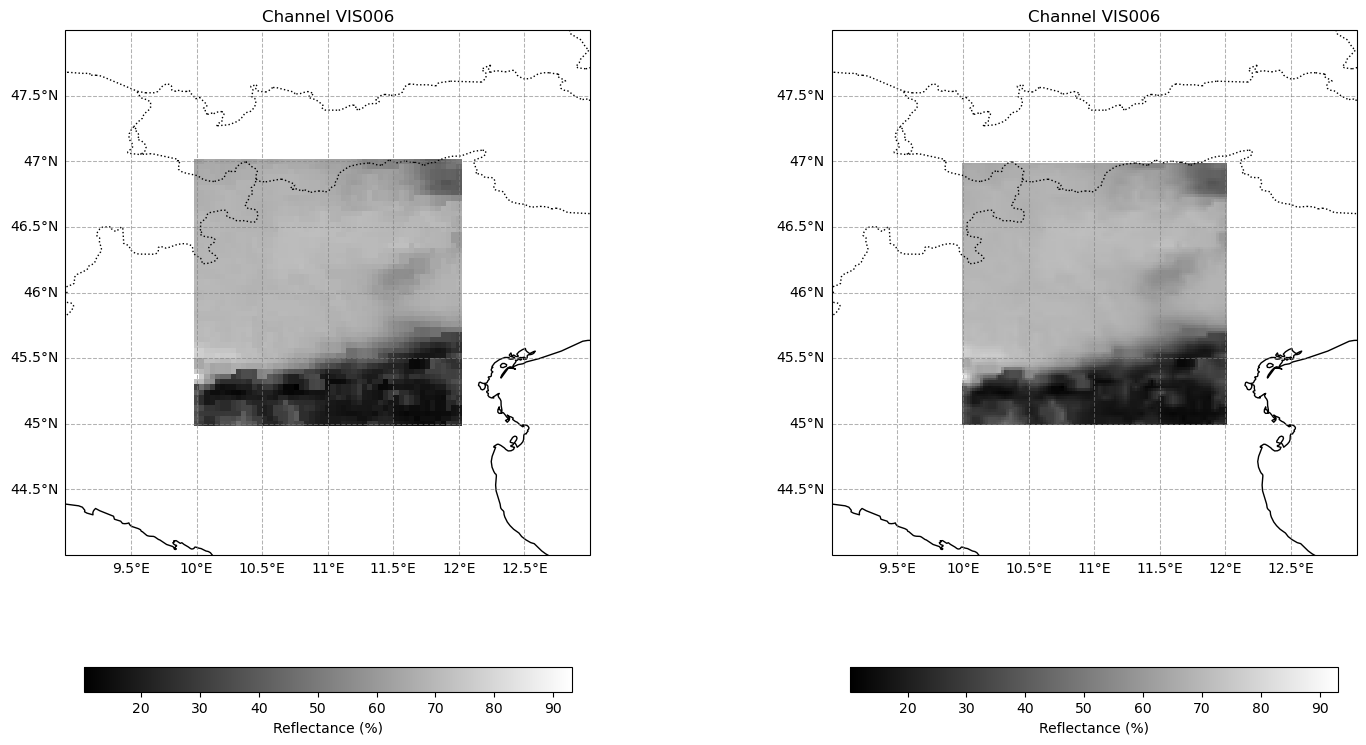

In [19]:
#Write the code for changing the grid to 0.02° #TODO all

# Step 1: Determine the current resolution (assuming uniform spacing for simplicity)
current_lat_res = 0.04
current_lon_res = 0.04

# Step 2: Create new grids with half the original spacing, doubling the resolution
new_lat = np.arange(ds_Trento.lat.min(), ds_Trento.lat.max() + current_lat_res/2, current_lat_res/2)
new_lon = np.arange(ds_Trento.lon.min(), ds_Trento.lon.max() + current_lon_res/2, current_lon_res/2)

# Step 3: Interpolate the dataset to the new grid
ds_higher_res = ds_Trento.interp(lat=new_lat, lon=new_lon, method='linear')

# Update the dataset's latitude and longitude with the new high-resolution grids
ds_higher_res['lat'] = new_lat
ds_higher_res['lon'] = new_lon


# Plot only one channel for each dataset 
num_rows = 1
num_cols = 2
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 8), subplot_kw={'projection': ccrs.PlateCarree()})
axs = axs.flatten()

reduce_area = lon_min, lon_max, lat_min, lat_max = 9, 13, 44, 48

# Plot one channel for both parallax and no parallax
plot_single_map(ds_Trento.isel(time=50), reduce_area, 'VIS006',axs[0],'Reflectance (%)','gray')
plot_single_map(ds_higher_res.isel(time=50), reduce_area, 'VIS006',axs[1],'Reflectance (%)','gray')

# Adjust layout
plt.tight_layout()
fig.subplots_adjust(hspace=0.1, wspace=0.1)

# Show plot
plt.show()

## Section 2:  Physics of the Channels

For this exercise, you will select specific timesteps during a hailstorm event. Your goal is to analyze the data through various visualizations, to understand the dynamics of the storm.

**Create a GIF**: Compile the single-channel images into a GIF to visualize the progression of the hailstorm. This dynamic representation can help identify areas of deep convective activity. 

**Plot RGB Images Using Satpy**: Use Satpy to plot RGB images for the selected timesteps. RGB composites can enhance certain features.

**Analyze IR Channel Combinations**:
Plot combinations of IR channels that are proxies for different cloud properties. Use these plots to identify areas with precipitating clouds or ice clouds


**2.1 Check Clouds Temporal Evolution**

(1 point) Here, you will plot a animated gif to check how cloud evolution using an Infrared channel (10.8) µm

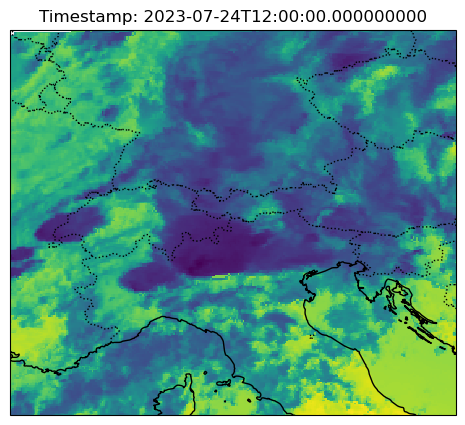

In [20]:
# Load your dataset (assuming it's already loaded as `ds`)
# Define the time range
start_time = pd.to_datetime('2023-07-24T12:00')
end_time = pd.to_datetime('2023-07-24T15:00')

# Select the data within the time range for specific channels
IR_ch = ds['IR_108'].sel(time=slice(start_time, end_time)) #TODO

# Assuming ds is already loaded and IR_ch selected
fig, ax = plt.subplots(figsize=(10, 5), subplot_kw={'projection': ccrs.PlateCarree()})

# Update function for the animation
def update(frame):
    ax.clear()  # Clear the axis to update the frame
    data_slice = IR_ch.isel(time=frame)  # Use the subset `IR_ch`

    # Assuming the data coordinates are in longitude and latitude
    img = ax.pcolormesh(data_slice['lon'], data_slice['lat'], data_slice.values,
                        transform=ccrs.PlateCarree(), cmap='viridis')  # TODO

    ax.coastlines()  # Add coastlines
    ax.add_feature(cfeature.BORDERS, linestyle=':')  # Add borders, if desired
    ax.set_extent(extent)

    ax.set_title(f"Timestamp: {data_slice.time.values}")
    return img,


# Number of frames is the number of time steps in the IR_ch subset
num_frames = len(IR_ch['time']) #TODO

ani = FuncAnimation(fig, update, frames=num_frames, blit=False)  # Set blit=False when using features like coastlines

HTML(ani.to_jshtml())


**Questions**

Q2.1A (1 point) Describe what you see in the figure. Can you spot the deep convetive system?

Q2.1.B (1 point) Try to repordue the same gif but using a visible channel. What is the difference?

**2.2 Create an RGB image**

(1 point) Using satpy, create a natural color images using visible channels

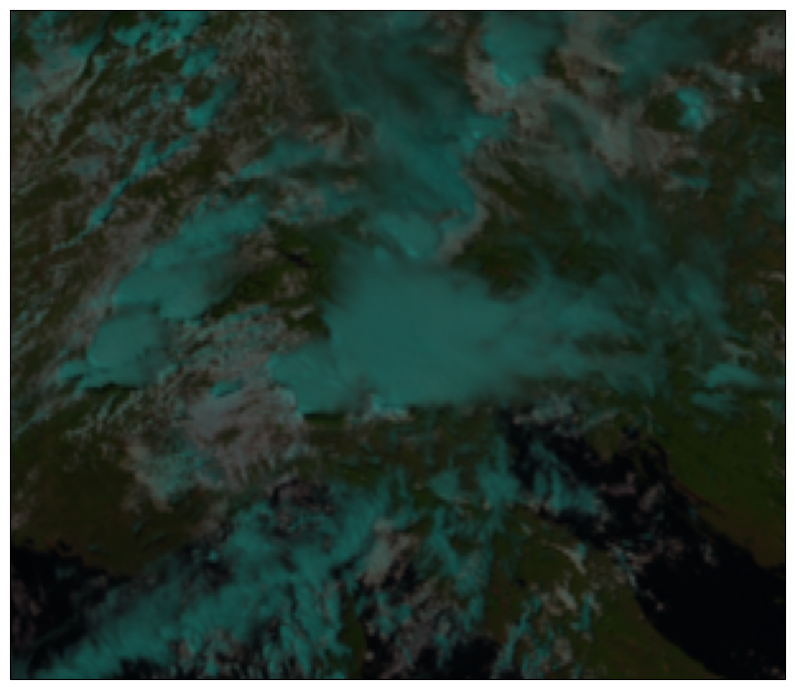

In [21]:
# Define the directory where your MSG data files are stored
filename = '/data/sat/msg/nat/2023/07/24/MSG3-SEVI-MSG15-0100-NA-20230724131242.380000000Z-NA.subset.nat'

# Create a Scene object
scn = satpy.Scene(reader='seviri_l1b_native', filenames=[filename])

# If you want to create a composite image (true color or similar)
scn.load(['natural_color'])  # This requires RGB channels, adjust as needed
scn.show('natural_color')

#Crop to area of interest
extent = lon_min, lon_max, lat_min, lat_max = 5., 16., 42., 51.5
crop_scn = scn.crop(ll_bbox=(lon_min, lat_min, lon_max, lat_max))

sat_data_crop = crop_scn['natural_color'].values 
#Rearrange dimensions to (height, width, 3)
sat_data_crop = np.transpose(sat_data_crop, (1, 2, 0))  # TODO

# Create a plot with a geographic projection
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()}) #TODO
ax.set_extent(extent, crs=ccrs.PlateCarree())

# Plot the RGB data
ax.imshow(np.fliplr(sat_data_crop).astype(int), origin='lower', extent=extent, transform=ccrs.PlateCarree())

# Show the plot
plt.show()

**Questions**

Q2.2 (1 point) Which are clearly the features that are visibile using the RGB? What about the clouds?

**2.3 Infrared Channel Combinations**

(1 point) Explore cloud properties using IR channel difference

6.2-10.8 µm and 7.3-12 µm --> Cloud Top Height
Difference between a channel in the water vapor absorption band and the atmospheric window can help distiguish among low-/medium- level clouds and high-level clouds.

8.7-10.8 µm --> Cloud Phase
The absorption of ice and water particles is different for these 2 wavelenghts.

10.8-12 µm --> Cloud Optical Thickness
These 2 close channels both lying in the atmospheric windows can help retrieving the Cloud Optical Thickess

3.9-10.8 µm and  3.9-7.3 µm --> Cloud Water Path 
The Near IR 3.9 µm channels is sensible to particle radius while the two IR 10.8 µm and 7.3 µm are sensible to cloud top height so toghether they can be used to estimate cloud wate path


<xarray.Dataset> Size: 152MB
Dimensions:        (lat: 239, lon: 276, time: 96)
Coordinates:
  * lat            (lat) float32 956B 42.0 42.04 42.08 ... 51.44 51.48 51.52
  * lon            (lon) float32 1kB 5.0 5.04 5.08 5.12 ... 15.92 15.96 16.0
  * time           (time) datetime64[ns] 768B 2023-07-24 ... 2023-07-24T23:45:00
Data variables:
    WV_062-IR_108  (time, lat, lon) float32 25MB -40.09 -44.94 ... -39.89 -38.05
    IR_087-IR_108  (time, lat, lon) float32 25MB -0.8302 -0.6345 ... -3.092
    IR_108-IR_120  (time, lat, lon) float32 25MB 3.097 3.235 ... 0.8159 1.005
    IR_039-IR_108  (time, lat, lon) float32 25MB 5.897 4.476 ... -3.407 -2.326
    IR_039-WV_073  (time, lat, lon) float32 25MB 31.88 34.47 ... 16.98 16.61
    WV_073-IR_120  (time, lat, lon) float32 25MB -22.89 -26.75 ... -19.57 -17.93


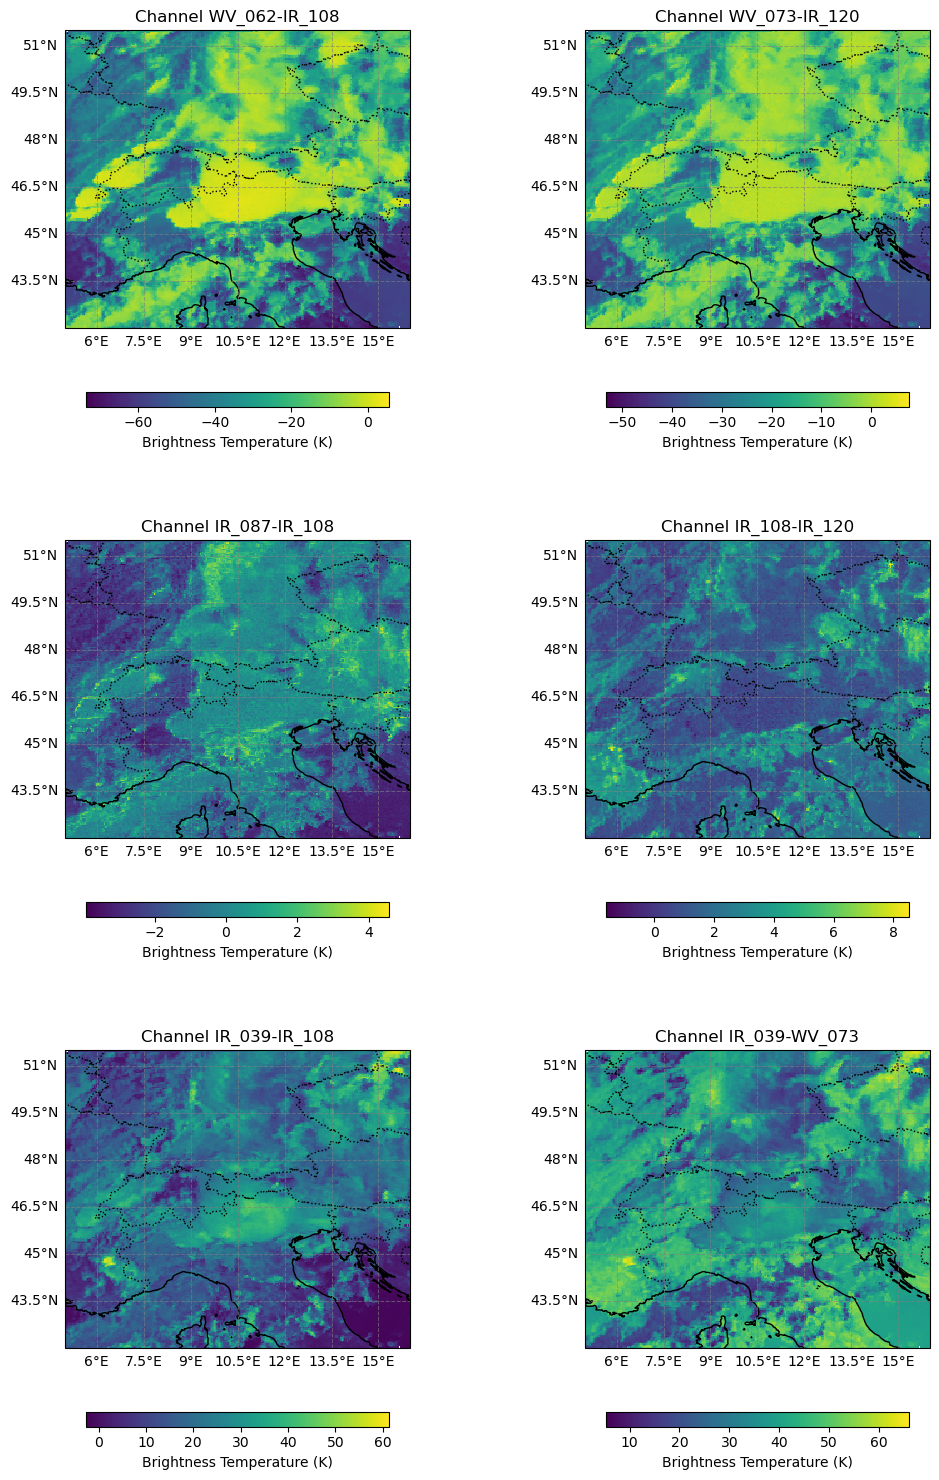

In [22]:
# Create a new dataset for combinations, copying coordinates from the dataset we are using
combinations_ds = xr.Dataset(coords=ds.coords)
#print(combinations_ds)

# Calculate combinations and add them to the new dataset TODO
combinations_ds['WV_062-IR_108'] = ds['WV_062'] - ds['IR_108']
combinations_ds['IR_087-IR_108'] = ds['IR_087'] - ds['IR_108']
combinations_ds['IR_108-IR_120'] = ds['IR_108'] - ds['IR_120']
combinations_ds['IR_039-IR_108'] = ds['IR_039'] - ds['IR_108']
combinations_ds['IR_039-WV_073'] = ds['IR_039'] - ds['WV_073']
combinations_ds['WV_073-IR_120'] = ds['WV_073'] - ds['IR_120']

print(combinations_ds)

#plot each combination
channels = ['WV_062-IR_108','WV_073-IR_120','IR_087-IR_108', 'IR_108-IR_120', 'IR_039-IR_108' , 'IR_039-WV_073' ]
extent = lon_min, lon_max, lat_min, lat_max = 5., 16., 42., 51.5

# Select a timestamp
data_ss = combinations_ds.isel(time=50)

# Define a Figure TODO
num_rows = 3
num_cols = 2
fig, axs = plt.subplots(num_rows, num_cols, figsize=(10, 15), subplot_kw={'projection': ccrs.PlateCarree()})
axs = axs.flatten()

# Plot each channel
for i, channel in enumerate(channels):
    plot_single_map(data_ss, extent, channel,axs[i],'Brightness Temperature (K)','viridis')

# Adjust layout
plt.tight_layout()
fig.subplots_adjust(hspace=0.2, wspace=0.2)

# Show plot
plt.show()


**Questions**:

**6.2-10.8 µm and 7.3-12 µm**

Q2.3 A (1 point) Using the BTD maps derived from the 6.2-10.8 µm and 7.3-12 µm channel differences, can you identify regions indicative of convective cloud activity? Describe the BTD signatures that help distinguish these cloud types 

Q2.3 B (2 points) Both BTD maps from the 6.2-10.8 µm and 7.3-12 µm channel differences appear similar at first glance. What subtle differences can be observed between the two, and how might differences in their respective weighting functions explain these variations? 

Q2.3 C (2 points) Under what circumstances might the BTD exhibit slightly positive values? 


**8.7 - 10.8 µm**

Q2.3 D (2 points) Explain how the difference between the 8.7 µm and 10.8 µm channels helps differentiate between ice clouds and water clouds. What does a positive/negative BTD typically signify about the cloud's composition?

Q2.3 E (1 point) For the channel difference of 8.7-10.8 µm, which areas of the map indicate the presence of ice clouds versus water clouds? Compare this to the CTH (6.2-10.8 µm and 7.3-12 µm), what can you say?

**10.8 - 12 µm**

Q2.3 F (2 points) How can the difference between the 10.8 µm and 12 µm channels be used to distinguish between optically thick and thin clouds?

Q2.3 G (1 points) In the map, where are locatedthe optically thicker clouds. What implications does optical thickness have for weather phenomena like precipitation?

**3.9 - 10.8 µm and 3.9 - 7.3 µm** 

Q2.3 H (1 point) Based on the BTD observed in 3.9 - 7.3 µm channel difference, can you identify areas of the map showing high CWP? What characteristics would you infer about these clouds?

Q2.3 I (2 points)  Which is the main difference between BTD 3.9-10.8 and 3.9-7.3 ? 

**Answers**:

Q2.3 A The deep convective area are indicated by the less negative area or really close to zero (e.g the yellow patches). Infact the teermal emission of the amotspheric windows (10.8 or 12) would have a similar BT that the upper/middle level water vapor emission (6.2 or 7.3 µm).  

Q2.3 B The value of the 7.3-12 µm maps are just slightly shifted toworads more positive values. This is due to the weighting fuctions. In fact, the 7.3 µm is more sensitive to water vapor layer that are lower in altitude (so higher BT) with respect to the 6.2 µm. 

Q2.3 C Positive diﬀerences may occur when water vapour is present in the stratosphere which has higher BT with respect to the cloud top, which is a still a sign of convective cloud tops.

Q2.3 D The difference between the 8.7 µm and 10.8 µm channels helps differentiate between ice clouds and water clouds because of the distinct absorption properties of ice and water at these wavelengths. A positive BTD typically indicates ice clouds, as ice has higher absorption at 8.7 µm compared to water, resulting in colder BT at 8.7 µm and hence a positive difference when subtracted from the 10.8 µm BT.

Q2.3 E The presence of the ice corresponds to the clouds with higher CTH.

Q2.3 F Optically thick clouds tend to absorb and re-emit infrared radiation more effectively, resulting in a smaller temperature difference (BTD), whereas optically thin clouds show larger BTD due to less absorption and more ground radiation passing through. 

Q2.3 G Again, the cloud patch in the middle of the doamin, that shows the convective clouds. This property is crucial for predicting precipitation, as optically thick clouds are more likely to produce significant rainfall.

Q2.3 H Large particles together with a high optical thickness (high CWP) result in medium values of BTD. So the area with medium-high BTD likely correspond to the precipitating clouds.

Q2.3 I higher ΔT3.9-7.3 values compared to ΔT3.9-10.8. This is due to the diminishing effect of the water vapour absorption and emission in mid- to low tropospheric levels on the BT in the 7.3 µm channel. SO the high CWP doesn't strictly correspond to the medium range of BTD.


## Resources

MSG Data can be freely downloaded from EUMETSAT: 

https://www.eumetsat.int/

For handling satellite using Python, Satpy package is highly recommended: 

https://satpy.readthedocs.io/en/stable/

Community about satllite remote sensing, Pytroll: 

https://pytroll.github.io/

More general Python tutorial

https://comptools.climatematch.io/tutorials/intro.html

https://unidata.github.io/python-training/python/intro-to-python/

https://projectpythia.org/

## References

Some papers about satellite remote sensing for precipitation

Inoue, T. (1987). A cloud type classification with NOAA 7 split‐window measurements. Journal of Geophysical Research: Atmospheres, 92(D4), 3991-4000.

Lazri, M., Ameur, S., Brucker, J.M. et al. Identification of raining clouds using a method based on optical and microphysical cloud properties from Meteosat second generation daytime and nighttime data. Appl Water Sci 3, 1–11 (2013). https://doi.org/10.1007/s13201-013-0079-0

Lazri, M., Ameur, S., Brucker, J. M., & Ouallouche, F. (2014). Convective rainfall estimation from MSG/SEVIRI data based on different development phase duration of convective systems (growth phase and decay phase). Atmospheric research, 147, 38-50.

Nauss, T., & Kokhanovsky, A. A. (2006). Discriminating raining from non-raining clouds at mid-latitudes using multispectral satellite data. Atmospheric Chemistry and Physics, 6(12), 5031-5036.

Schmetz, J., Tjemkes, S. A., Gube, M., & Van de Berg, L. (1997). Monitoring deep convection and convective overshooting with METEOSAT. Advances in Space Research, 19(3), 433-441.

Strabala, K. I., S. A. Ackerman, and W. P. Menzel, 1994: Cloud Properties inferred from 812-µm Data. J. Appl. Meteor. Climatol., 33, 212–229, https://doi.org/10.1175/1520-0450(1994)033<0212:CPIFD>2.0.CO;2. 

Thies, B., Nauss, T., & Bendix, J. (2008). Delineation of raining from non-raining clouds during nighttime using Meteosat-8 data. Meteorol. Appl, 15, 219-230.

Thies, B., Turek, A., Nauss, T., & Bendix, J. (2010). Weather type dependent quality assessment of a satellite-based rainfall detection scheme for the mid-latitudes. Meteorology and atmospheric physics, 107, 81-89.


